In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import pickle
import webcolors

In [28]:
num_to_items={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [29]:
pickle_in = open("fashion_model.pickle","rb")
model = pickle.load(pickle_in)

In [30]:
def makebgdark(fashion_img):
    mid_index = (int(fashion_img.shape[0]/2), int(fashion_img.shape[1]/2))
    bg_value = (fashion_img[0][0][0] + fashion_img[0][0][1] + fashion_img[0][0][2])/3;
    obj_value = (fashion_img[mid_index[0]][mid_index[1]][0] + fashion_img[mid_index[0]][mid_index[1]][1] + fashion_img[mid_index[0]][mid_index[1]][2])/3;
    if(bg_value>obj_value):
        return 255-fashion_img
    else:
        return fashion_img

In [92]:
def predictFashionItem(fashion_img):
    fashion_img = makebgdark(fashion_img)
    fashion_img = cv2.cvtColor(fashion_img, cv2.COLOR_BGR2GRAY)
    fashion_img = cv2.resize(fashion_img, (28,28))
    plt.imshow(fashion_img)
    fashion_img = fashion_img.reshape(1,28,28,1)
    fashion_img = fashion_img/255.0
    
    
    predict_array = model.predict(fashion_img)

    mx_chance = max(predict_array[0])
    hash = -1
    for i in range(0, len(predict_array[0])):
        if(mx_chance == predict_array[0][i]):
            hash = i
            
    return num_to_items[hash]

In [33]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [89]:
def predictColor(fashion_img):
    mid_index = (int(fashion_img.shape[0]/2), int(fashion_img.shape[1]/2))
    obj_color = (fashion_img[mid_index[0]][mid_index[1]][0],fashion_img[mid_index[0]][mid_index[1]][1], fashion_img[mid_index[0]][mid_index[1]][2])
    #print(obj_color)
    return get_colour_name(obj_color)

In [67]:
def getTags(fashion_img):
    search_string = predictColor(fashion_img)[1] + " " + predictFashionItem(fashion_img)
    return search_string

darkslategray T-shirt/top


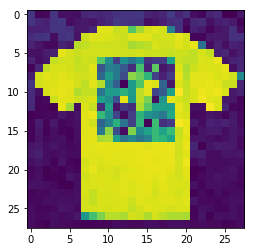

In [93]:
example_img2 = plt.imread("./images/images (3).jpeg")
plt.imshow(example_img2)
stri = getTags(example_img2)
print(stri)

images/images (3).jpeg
darkslategray T-shirt/top
images/download (3).jpeg
tan Bag
images/download.jpeg
white Trouser
images/images (2).jpeg
sienna Bag
images/gold.jpg
gold T-shirt/top
images/images.jpeg
darkgray Shirt
images/download (2).jpeg
darkslategray Bag
images/images (1).jpeg
tomato Dress
images/download (1).jpeg
firebrick Coat


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


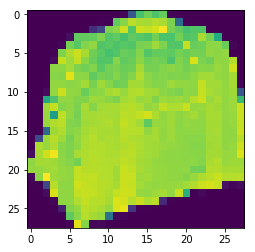

In [95]:
import os

directory = "images/"
for filename in os.listdir(directory):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
        path = os.path.join(directory, filename)
        print(path)
        img = plt.imread("./"+path)
        search_tag = getTags(img)
        print(search_tag)